In [103]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

files = glob.glob('./server_results/grid_search_strategies/*.csv')

In [104]:
def best_aggregate(df):


    # print(df['method_strategy'])

    df_grouped = df.groupby(['method_strategy'])['mrr'].agg(
        ['median', 'mean', 'min', 'max', 'std']).reset_index()

    df_grouped = df_grouped.sort_values(by='mean', ascending=False)

    print(df_grouped.head(10).to_string())
    return df_grouped


def plot_boxplot(df, x, y, datasetname):
    # Create the figure and axes with a narrower width (e.g., 8)
    fig, ax = plt.subplots(figsize=(6.5, 2))  # Make the plot narrower by reducing the width


    df = df[df[x].str.contains('strsim:-1')]

    print(df[x].unique())
    replacement_dict = {
        'strsim:-1_emb:1_eq:-1': 'EMB',
        'strsim:-1_emb:-1_eq:1': 'EQ',
        'strsim:-1_emb:1_eq:2': 'EMB, then EQ',
        'strsim:-1_emb:2_eq:1': 'EQ, then EMB',
    }

    df[x] = df[x].replace(replacement_dict)


    # Compute the average mean of y for each x and use this as the order
    order = df.groupby(x)[y].mean().sort_values(ascending=False).index

    # Plot the boxplot with narrower boxes
    sns.boxplot(
        data=df,
        x=x,  # Plot data along the x-axis
        y=y,  # Plot distribution of 'y' variable
        ax=ax,
        palette=sns.color_palette("Set2"),  # Use a better palette
        width=0.5,  # Adjust box width (default is usually around 0.8)
        order=order  # Use the computed order
         , showfliers=False
    )
    
    # Set labels and title
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels())
    ax.set_ylabel(y.upper(), fontsize=12)
    # ax.set_title(f'{y} Distribution for {x} in {datasetname}', fontsize=14)
    
    # Customize ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    sns.despine()

    # Save the figure as a high-resolution PDF
    fig.savefig("figures/grid_search_strategies.pdf", format='pdf', dpi=300)
    
    # Adjust layout to ensure everything fits
    plt.tight_layout()
    plt.show()


Analyzing GDC
['strsim:-1_emb:1_eq:-1' 'strsim:-1_emb:-1_eq:1' 'strsim:-1_emb:1_eq:2'
 'strsim:-1_emb:2_eq:1']


/var/folders/kt/v8ddhvyx5kv0zx8hg7_zkb4m0000gn/T/ipykernel_38618/2183391367.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].replace(replacement_dict)


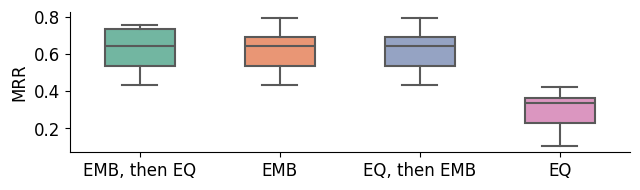

Analyzing GDC
['strsim:-1_emb:1_eq:-1' 'strsim:-1_emb:-1_eq:1' 'strsim:-1_emb:1_eq:2'
 'strsim:-1_emb:2_eq:1']


/var/folders/kt/v8ddhvyx5kv0zx8hg7_zkb4m0000gn/T/ipykernel_38618/2183391367.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].replace(replacement_dict)


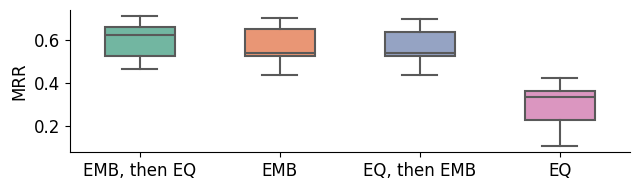

Analyzing musicians
['strsim:-1_emb:1_eq:-1' 'strsim:-1_emb:-1_eq:1' 'strsim:-1_emb:1_eq:2'
 'strsim:-1_emb:2_eq:1']


/var/folders/kt/v8ddhvyx5kv0zx8hg7_zkb4m0000gn/T/ipykernel_38618/2183391367.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].replace(replacement_dict)


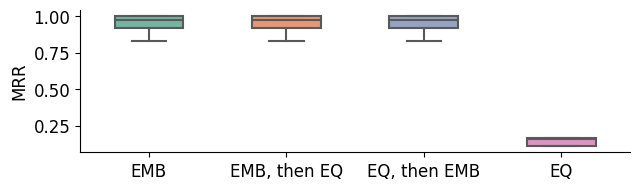

/var/folders/kt/v8ddhvyx5kv0zx8hg7_zkb4m0000gn/T/ipykernel_38618/2183391367.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].replace(replacement_dict)


Analyzing Magellan
['strsim:-1_emb:1_eq:-1' 'strsim:-1_emb:-1_eq:1' 'strsim:-1_emb:1_eq:2'
 'strsim:-1_emb:2_eq:1']


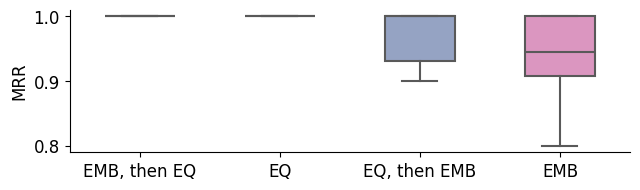

In [105]:
all_dfs = []
for file in files:
    datasetname = file.split('_')[0]
    datasetname = file.split('/')[-1].split('_')[0]
    print(f'Analyzing {datasetname}')
    df = pd.read_csv(file)
    # print(df.head())


    df['strategy'] = (
        'strsim:' + df['strsim'].astype(str) +
        '_emb:' + df['emebedding'].astype(str) +
        '_eq:' + df['equal'].astype(str)
    )

    all_dfs.append(df)


    plot_boxplot(df, 'strategy', 'mrr', datasetname)

/var/folders/kt/v8ddhvyx5kv0zx8hg7_zkb4m0000gn/T/ipykernel_38618/2183391367.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].replace(replacement_dict)


['strsim:-1_emb:1_eq:-1' 'strsim:-1_emb:-1_eq:1' 'strsim:-1_emb:1_eq:2'
 'strsim:-1_emb:2_eq:1']


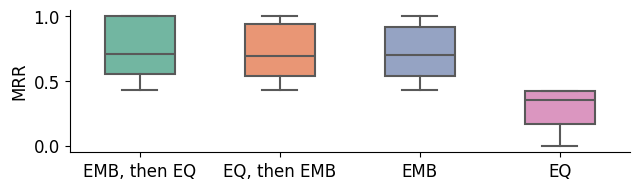

In [106]:
all_dfs = pd.concat(all_dfs)
plot_boxplot(all_dfs, 'strategy', 'mrr', 'all_datasets')

In [107]:
print('Aggregates')
for file in files:
    datasetname = file.split('_')[0]
    datasetname = file.split('/')[-1].split('_')[0]
    print(f'Analyzing {datasetname}')
    df = pd.read_csv(file)
    # print(df.head())


    df['method_strategy'] = (
        'strsim:' + df['strsim'].astype(str) +
        '_emb:' + df['emebedding'].astype(str) +
        '_eq:' + df['equal'].astype(str)
    )


    df_grouped = best_aggregate(df)

Aggregates
Analyzing GDC
          method_strategy    median      mean       min       max       std
2    strsim:-1_emb:1_eq:2  0.641667  0.617717  0.433333  0.754762  0.117123
1   strsim:-1_emb:1_eq:-1  0.641667  0.616568  0.433333  0.790476  0.118292
3    strsim:-1_emb:2_eq:1  0.641667  0.616568  0.433333  0.790476  0.118292
7     strsim:1_emb:2_eq:3  0.641667  0.608574  0.433333  0.734848  0.109864
6    strsim:1_emb:2_eq:-1  0.602339  0.600522  0.433333  0.754464  0.108839
8     strsim:1_emb:3_eq:2  0.602339  0.600522  0.433333  0.754464  0.108839
12    strsim:2_emb:3_eq:1  0.602339  0.600522  0.433333  0.754464  0.108839
11    strsim:2_emb:1_eq:3  0.555511  0.563358  0.393981  0.702922  0.115591
10   strsim:2_emb:1_eq:-1  0.555511  0.521614  0.310648  0.702922  0.141554
13    strsim:3_emb:1_eq:2  0.555511  0.521614  0.310648  0.702922  0.141554
Analyzing GDC
          method_strategy    median      mean       min       max       std
2    strsim:-1_emb:1_eq:2  0.625000  0.598535  0.